# Synthetic Dataset Training: Basic

## Dataset

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

$$y[i] = 1.008^{x[i]} - \sin(x[i])$$

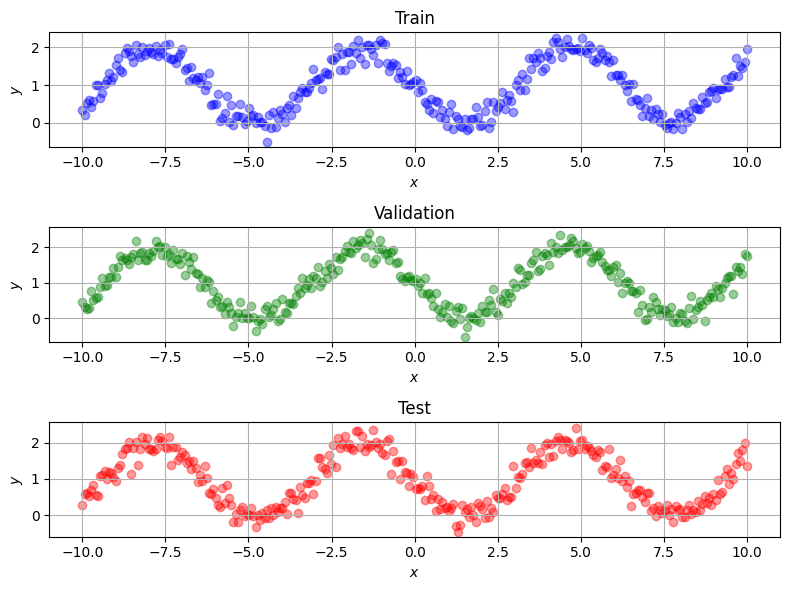

In [8]:
##### Input #####
x = torch.linspace(-10, 10, 300).unsqueeze(1)

##### Output #####

torch.manual_seed(21)
y_noiseless = 1.008 ** x - torch.sin(x)
y_train = y_noiseless +  0.2 * torch.randn(y_noiseless.shape)
y_val = y_noiseless + 0.2 * torch.randn(y_noiseless.shape)
y_test = y_noiseless + 0.2 * torch.randn(y_noiseless.shape)

##### Visualize #####
fig1, ax = plt.subplots(3, 1, figsize=(8, 6))

ax[0].scatter(x.numpy(), y_train.numpy(), c='blue', alpha=0.4)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].set_title('Train')
ax[0].grid()

ax[1].scatter(x.numpy(), y_val.numpy(), c='green', alpha=0.4)
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y$')
ax[1].set_title('Validation')
ax[1].grid()

ax[2].scatter(x.numpy(), y_test.numpy(), c='red', alpha=0.4)
ax[2].set_xlabel('$x$')
ax[2].set_ylabel('$y$')
ax[2].set_title('Test')
ax[2].grid()

plt.tight_layout()
plt.show()


## Feed Forward Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [10]:
##### Construct a model #####

class FFN(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.input = nn.Linear(input_size, 20)
        self.hidden1 = nn.Linear(20, 20)
        self.hidden2 = nn.Linear(20, 20)
        self.output = nn.Linear(20, 1)

    def forward(self, input):
        output = self.input(input)
        output = F.relu(output)
        output = self.hidden1(output)
        output = F.relu(output)
        output = self.hidden2(output)
        output = F.relu(output)
        output = self.output(output)
        return output

In [ ]:
##### Initialize the model ######
torch.manual_seed(21)
model = FFN(input_size=1)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

print("\n--- Model ---")
print("Model architecture:")
print(model)
print(f"Total parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")
print('\n--------------')

##### Train the model #####

max_epochs = 2000
train_losses = []
val_losses = []

print("Training started...")
for epoch in range(max_epochs):
    model.train()
    y_pred = model(x)
    train_loss = criterion(y_pred, y_train)
    train_losses.append(train_loss.item())

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        y_val_pred = model(x)
        val_loss = criterion(y_val_pred, y_val)
        val_losses.append(val_loss.item())

    if epoch % 100 == 0 or epoch == max_epochs-1:
        print(f'Epoch {epoch} | Train loss: {train_loss.item():.4f} | Validation loss: {val_loss.item(): .4f}')
    
print("Training completed")


--- Model ---
Model architecture:
FFN(
  (input): Linear(in_features=1, out_features=20, bias=True)
  (hidden1): Linear(in_features=20, out_features=20, bias=True)
  (hidden2): Linear(in_features=20, out_features=20, bias=True)
  (output): Linear(in_features=20, out_features=1, bias=True)
)
Total parameters: 901

--------------
Training started...
Epoch 0 | Train loss: 1.8745 | Validation loss:  1.7887
Epoch 100 | Train loss: 0.6451 | Validation loss:  0.6720
Epoch 200 | Train loss: 0.4761 | Validation loss:  0.4882
Epoch 300 | Train loss: 0.3446 | Validation loss:  0.3458
Epoch 400 | Train loss: 0.2520 | Validation loss:  0.2490
Epoch 500 | Train loss: 0.2134 | Validation loss:  0.2102
Epoch 600 | Train loss: 0.1872 | Validation loss:  0.1850
Epoch 700 | Train loss: 0.1614 | Validation loss:  0.1600
Epoch 800 | Train loss: 0.1303 | Validation loss:  0.1306
Epoch 900 | Train loss: 0.0887 | Validation loss:  0.0915
Epoch 1000 | Train loss: 0.0553 | Validation loss:  0.0604
Epoch 1100 |

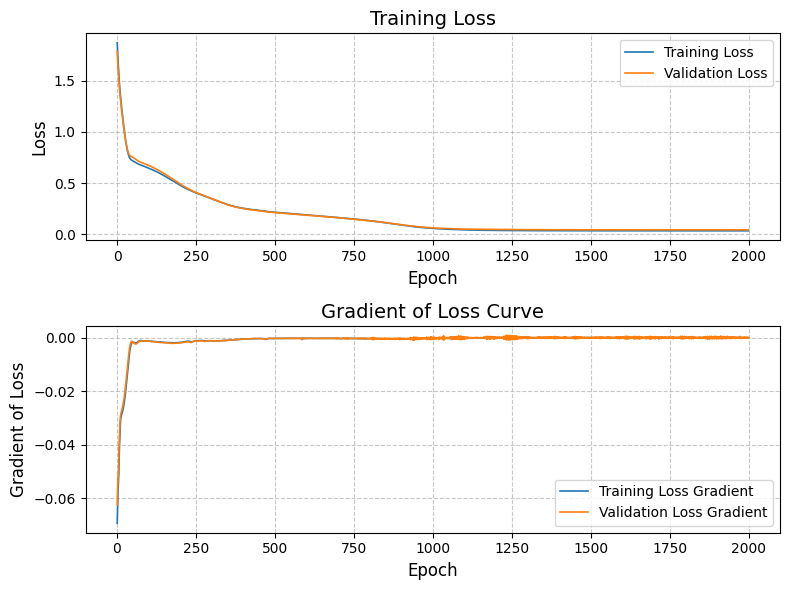

In [30]:
##### Compute Loss Gradient #####

train_losses_np = np.array(train_losses)
val_losses_np = np.array(val_losses)

train_losses_diff = np.diff(train_losses_np)
val_losses_diff = np.diff(val_losses_np)
epochs_diff = np.arange(1, len(train_losses_diff)+1)

##### Plot Loss Curve and Loss Gradient Curve #####

fig2, ax = plt.subplots(2, 1, figsize=(8, 6))

# --- Loss Curve ---
ax[0].plot(train_losses_np, label='Training Loss', linewidth=1.2)
ax[0].plot(val_losses_np, label='Validation Loss', linewidth=1.2)
ax[0].set_title('Training Loss', fontsize=14)
ax[0].set_xlabel('Epoch', fontsize=12)
ax[0].set_ylabel('Loss', fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.7)
ax[0].legend()

# --- Loss Gradient Curve ---
ax[1].plot(epochs_diff, train_losses_diff, label='Training Loss Gradient',  linewidth=1.2)
ax[1].plot(epochs_diff, val_losses_diff, label='Validation Loss Gradient',  linewidth=1.2)
ax[1].set_title('Gradient of Loss Curve', fontsize=14)
ax[1].set_xlabel('Epoch', fontsize=12)
ax[1].set_ylabel('Gradient of Loss', fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.7)
ax[1].legend()

plt.tight_layout()
plt.show()

Test MSE: 0.0525


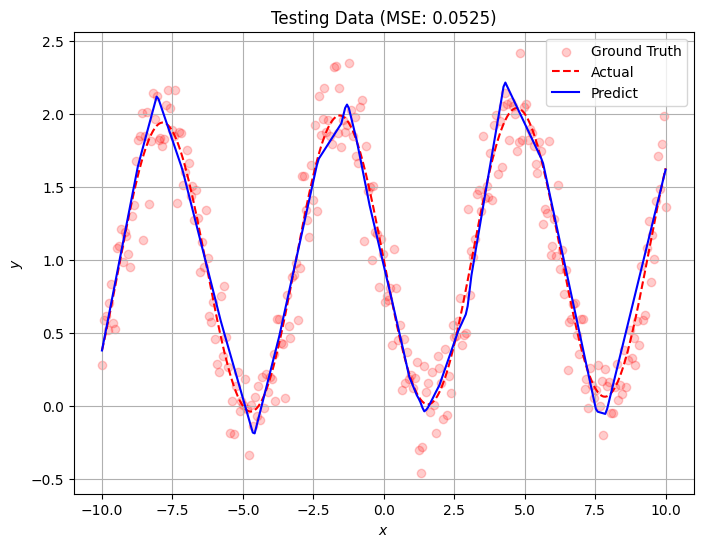

In [23]:
##### Evaluate the model #####
model.eval()

# Disable gradient calculation to save the memory (calculating it is completely useless)
with torch.no_grad():
    y_pred = model(x)

mse_test = criterion(y_pred, y_test).item()
print(f'Test MSE: {mse_test:.4f}')

fig3 = plt.figure(figsize=(8, 6))
plt.scatter(x.numpy(), y_test.numpy(), c='red', alpha=0.2, label='Ground Truth')
plt.plot(x.numpy(), y_noiseless.numpy(), linestyle='--', c='red', label='Actual')
plt.plot(x.numpy(), y_pred.numpy(), c='blue', label='Predict')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)
plt.title(f'Testing Data (MSE: {mse_test:.4f})')
plt.show()

## LSTM

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [9]:
##### Form a model #####
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=64):
        super().__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, hidden_size * 4),
            nn.ReLU(),
            nn.Linear(hidden_size * 4, hidden_size * 2),
            nn.ReLU(),
            nn.Linear(hidden_size * 2, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1)
            )

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq)  # lstm_out: (batch, seq_len, hidden)
        out = self.fc(lstm_out[:, -1, :])   # take last time step
        return out

In [10]:
##### Make a sequence using a sliding window #####

window_size = 6

x_seq_train = []
y_seq_train = []
for i in range(window_size, len(x)):
    seq = y_train[i-window_size:i] 
    x_seq_train.append(seq)
    y_seq_train.append(y_train[i])  # predict next y

x_seq_val = []
y_seq_val = []
for i in range(window_size, len(x)):
    seq = y_val[i-window_size:i]
    x_seq_val.append(seq)
    y_seq_val.append(y_val[i])  # predict next y

x_seq_test = []
y_seq_test = []    
for i in range(window_size, len(x)):
    seq = y_test[i-window_size:i] 
    x_seq_test.append(seq)
    y_seq_test.append(y_test[i])  # predict next y

x_seq_train = torch.stack(x_seq_train).float() 
x_seq_val = torch.stack(x_seq_val).float()
x_seq_test = torch.stack(x_seq_test).float()
y_seq_train = torch.stack(y_seq_train).float()
y_seq_val = torch.stack(y_seq_val).float()
y_seq_test = torch.stack(y_seq_test).float()

# ----- Dataset and dataloader -----
train_dataset = TensorDataset(x_seq_train, y_seq_train)
val_dataset = TensorDataset(x_seq_val, y_seq_val)
test_dataset = TensorDataset(x_seq_test, y_seq_test)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
##### Initialize the model #####
torch.manual_seed(21)
model = LSTM(input_size=1)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

print("\n--- Model ---")
print("Model architecture:")
print(model)
print(f"Total parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")
print('\n--------------')

##### Train the model #####

max_epochs = 500
train_losses = []
val_losses = []

# Adding an Early stopping
early_stop_count = 0    
patience = 5        
min_val_loss = float('inf')


#### In each iteration/epoch has training process and validation process (for early stopping) #####
best_model = model.state_dict()  # Initialize best_model

for epoch in range(max_epochs):
    
    # Train
    model.train()
    train_loss = []
    for batch in train_dataloader:
        x_batch, y_batch = batch
        optimizer.zero_grad()
        y_batch_pred = model(x_batch)
        loss = criterion(y_batch_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())

    train_loss = np.mean(train_loss)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = []
    with torch.no_grad():
        for batch in val_dataloader:
            x_batch, y_batch = batch
            y_batch_pred = model(x_batch)
            loss = criterion(y_batch_pred, y_batch)
            val_loss.append(loss.item())

    val_loss = np.mean(val_loss)
    val_losses.append(val_loss)

    if val_loss < min_val_loss:
        best_model = model.state_dict()
        min_val_loss = val_loss
        early_stop_count = 0
    else:
        early_stop_count += 1

    if early_stop_count >= patience: 
        print('Early Stopping!')
        break
    
    print(f'Epoch {epoch+1} | Train Loss: {train_loss: .4f} | Val Loss: {val_loss: .4f}')

model.load_state_dict(best_model)  # Load the best model


--- Model ---
Model architecture:
LSTM(
  (lstm): LSTM(1, 64, batch_first=True)
  (fc): Sequential(
    (0): Linear(in_features=64, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)
Total parameters: 75009

--------------
Epoch 1 | Train Loss:  1.2587 | Val Loss:  1.0375
Epoch 2 | Train Loss:  0.6925 | Val Loss:  0.2355
Epoch 3 | Train Loss:  0.2395 | Val Loss:  0.1832
Epoch 4 | Train Loss:  0.1541 | Val Loss:  0.1107
Epoch 5 | Train Loss:  0.0999 | Val Loss:  0.0942
Epoch 6 | Train Loss:  0.0853 | Val Loss:  0.1101
Epoch 7 | Train Loss:  0.0833 | Val Loss:  0.0867
Epoch 8 | Train Loss:  0.0734 | Val Loss:  0.0791
Epoch 9 | Train Loss:  0.0730 | Val Loss:  0.0747
Epoch 10 | Train Loss:  0.0756 | Val Loss:  0.0769
Epoch 11 | Train Loss:  0.0733 | Val Loss:  0.0709
Epoch 12 |

<All keys matched successfully>

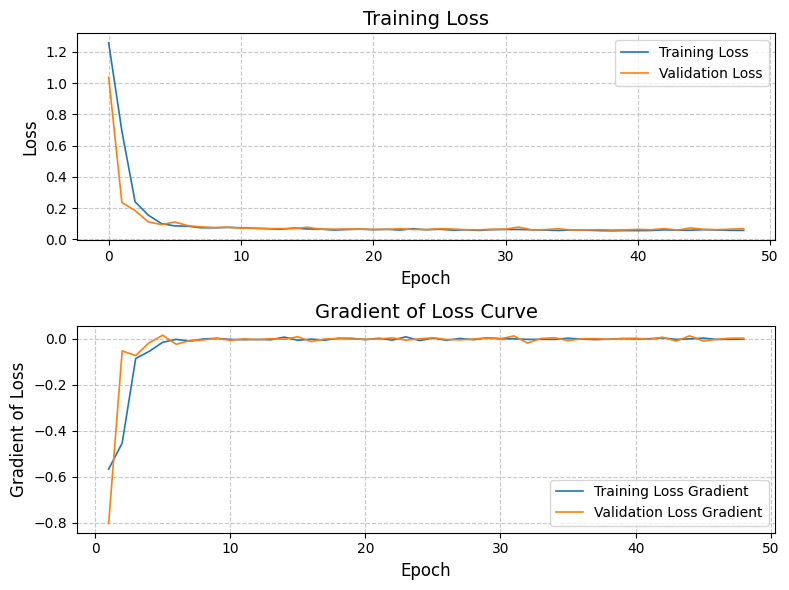

In [12]:
##### Compute Loss Gradient #####

train_losses_np = np.array(train_losses)
val_losses_np = np.array(val_losses)

train_losses_diff = np.diff(train_losses_np)
val_losses_diff = np.diff(val_losses_np)
epochs_diff = np.arange(1, len(train_losses_diff)+1)

##### Plot Loss Curve and Loss Gradient Curve #####

fig4, ax = plt.subplots(2, 1, figsize=(8, 6))

# --- Loss Curve ---
ax[0].plot(train_losses_np, label='Training Loss', linewidth=1.2)
ax[0].plot(val_losses_np, label='Validation Loss', linewidth=1.2)
ax[0].set_title('Training Loss', fontsize=14)
ax[0].set_xlabel('Epoch', fontsize=12)
ax[0].set_ylabel('Loss', fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.7)
ax[0].legend()

# --- Loss Gradient Curve ---
ax[1].plot(epochs_diff, train_losses_diff, label='Training Loss Gradient',  linewidth=1.2)
ax[1].plot(epochs_diff, val_losses_diff, label='Validation Loss Gradient',  linewidth=1.2)
ax[1].set_title('Gradient of Loss Curve', fontsize=14)
ax[1].set_xlabel('Epoch', fontsize=12)
ax[1].set_ylabel('Gradient of Loss', fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.7)
ax[1].legend()

plt.tight_layout()
plt.show()

Test MSE: 0.0722


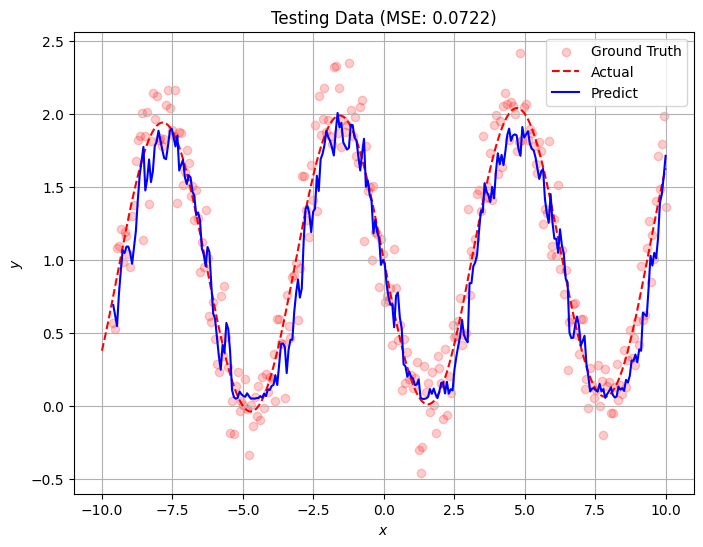

In [17]:
##### Evaluate the model #####
model.eval()

y_true = []
y_preds = []

# Disable gradient calculation to save memory and speed up computations
with torch.no_grad():
    for batch in test_dataloader:
        x_batch, y_batch = batch
        y_pred = model(x_batch)
        y_preds.append(y_pred)
        y_true.append(y_batch)

# Concatenate all batches
y_pred_all = torch.cat(y_preds, dim=0)
y_true_all = torch.cat(y_true, dim=0)
x_plot = x[window_size:]  # Adjust x for plotting

# Compute MSE
mse_test = criterion(y_pred_all, y_true_all).item()
print(f'Test MSE: {mse_test:.4f}')

# Plot predictions vs true values
fig5 = plt.figure(figsize=(8, 6))
plt.scatter(x_plot.numpy(), y_true_all.numpy(), c='red', alpha=0.2, label='Ground Truth')
plt.plot(x.numpy(), y_noiseless.numpy(), linestyle='--', c='red', label='Actual')
plt.plot(x_plot.numpy(), y_pred_all.numpy(), c='blue', label='Predict')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)
plt.title(f'Testing Data (MSE: {mse_test:.4f})')
plt.show()

## Transformer

In [66]:
import torch
import torch.nn as nn
import torch.functional as F
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

from sklearn.preprocessing import StandardScaler
from torch.optim.lr_scheduler import ReduceLROnPlateau

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Positional Encoding

The positional encoding is used to give the model information about the position of each token in the sequence. It is defined as:
$$\text{PE}_{(\text{pos}, 2i)} = \sin\left(\frac{\text{pos}}{10000^{2i/d_\text{model}}}\right)$$
$$\text{PE}_{(\text{pos}, 2i+1)} = \cos\left(\frac{\text{pos}}{10000^{2i/d_\text{model}}}\right)$$
where $\text{pos}$ is the position of the token in the sequence, $i$ is the dimension index, and $d_\text{model}$ is the dimensionality of the model.

In [ ]:
##### Construct the model #####

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)       # size: (max_len, 1)
        div_term = 1/10000 ** (torch.arange(0, d_model, 2).float() / d_model)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        
        pe = pe.unsqueeze(0).transpose(0, 1)
        
        self.register_buffer('pe', pe)
    
    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)
    
class TransformerModel(nn.Module):
    def __init__(self, input_dim=1, d_model=16, nhead=4, num_layers=2, dropout=0.1):
        super().__init__()

        self.input_embedding = nn.Linear(input_dim, d_model)
        self.pos_encoder = PositionalEncoding(d_model, dropout)
        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.fc = nn.Sequential(
            nn.Linear(d_model, d_model * 4),
            nn.ReLU(),
            nn.Linear(d_model * 4, d_model * 2),
            nn.ReLU(),
            nn.Linear(d_model * 2, d_model),
            nn.ReLU(),
            nn.Linear(d_model, 1)
            )

    def forward(self, x):
        x = self.input_embedding(x)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = self.fc(x[:, -1, :])
        return x

In [19]:
##### Make a sequence using a sliding window #####

window_size = 6

x_seq_train = []
y_seq_train = []
for i in range(window_size, len(x)):
    seq = y_train[i-window_size:i]  
    x_seq_train.append(seq)
    y_seq_train.append(y_train[i])  # predict next y

x_seq_val = []
y_seq_val = []
for i in range(window_size, len(x)):
    seq = y_val[i-window_size:i]  
    x_seq_val.append(seq)
    y_seq_val.append(y_val[i])  # predict next y

x_seq_test = []
y_seq_test = []    
for i in range(window_size, len(x)):
    seq = y_test[i-window_size:i] 
    x_seq_test.append(seq)
    y_seq_test.append(y_test[i])  # predict next y

x_seq_train = torch.stack(x_seq_train).float()
x_seq_val = torch.stack(x_seq_val).float()
x_seq_test = torch.stack(x_seq_test).float()
y_seq_train = torch.stack(y_seq_train).float()  # [N, 1]
y_seq_val = torch.stack(y_seq_val).float()
y_seq_test = torch.stack(y_seq_test).float()

# ----- Dataset and dataloader -----
train_dataset = TensorDataset(x_seq_train, y_seq_train)
val_dataset = TensorDataset(x_seq_val, y_seq_val)
test_dataset = TensorDataset(x_seq_test, y_seq_test)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
##### Initialize the model ######
torch.manual_seed(21)
model = TransformerModel(input_dim=1)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

print("\n--- Model ---")
print("Model architecture:")
print(model)
print(f"Total parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")
print('\n--------------')

##### Train the model #####
max_epochs = 100
train_losses = []
val_losses = []

#### Adding an Early stopping and Scheduler into the training process #####
early_stop_count = 0    
patience = 5        
min_val_loss = float('inf')

#### In each iteration/epoch has training process and validation process (for early stopping) #####

best_model = model.state_dict()  # Initialize best_model
for epoch in range(max_epochs):
    # Train
    model.train()
    train_loss = []
    for batch in train_dataloader:
        x_batch, y_batch = batch
        optimizer.zero_grad()
        y_batch_pred = model(x_batch)
        loss = criterion(y_batch_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())

    train_loss = np.mean(train_loss)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = []
    with torch.no_grad():
        for batch in val_dataloader:
            x_batch, y_batch = batch
            y_batch_pred = model(x_batch)
            loss = criterion(y_batch_pred, y_batch)
            val_loss.append(loss.item())

    val_loss = np.mean(val_loss)
    val_losses.append(val_loss)

    if val_loss < min_val_loss:
        min_val_loss = val_loss
        early_stop_count = 0
        best_model = model.state_dict()
    else:
        early_stop_count += 1

    if early_stop_count >= patience: 
        print('Early Stopping!')
        break
    
    print(f'Epoch {epoch} | Train Loss: {train_loss: .4f} | Val Loss: {val_loss: .4f}')

model.load_state_dict(best_model)  # Load the best model

c:\Users\YotsapatSK140\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\nn\modules\transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(



--- Model ---
Model architecture:
TransformerModel(
  (encoder): Linear(in_features=1, out_features=16, bias=True)
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=16, out_features=16, bias=True)
        )
        (linear1): Linear(in_features=16, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=16, bias=True)
        (norm1): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (fc): Sequential(
    (0): Linear(in_features=16, out_features=64, bias=True)
    (

<All keys matched successfully>

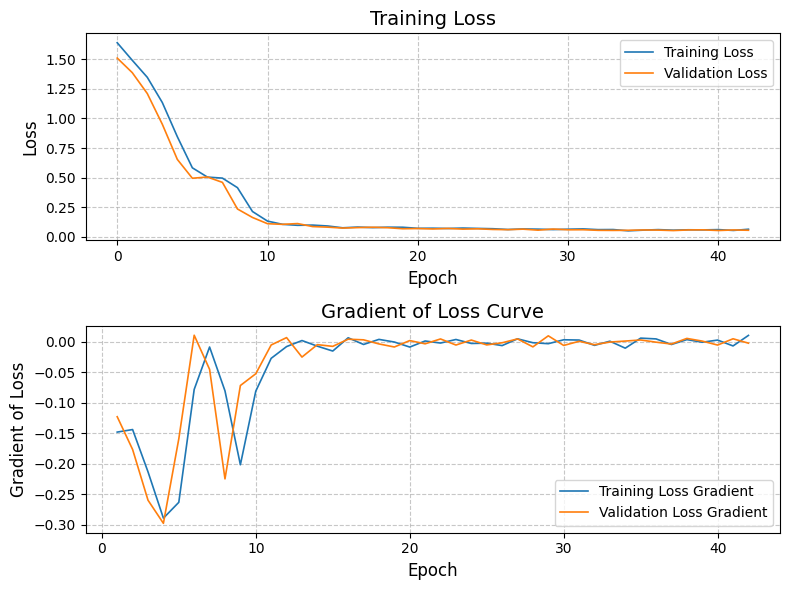

In [21]:
##### Compute Loss Gradient #####

train_losses_np = np.array(train_losses)
val_losses_np = np.array(val_losses)

train_losses_diff = np.diff(train_losses_np)
val_losses_diff = np.diff(val_losses_np)
epochs_diff = np.arange(1, len(train_losses_diff)+1)

##### Plot Loss Curve and Loss Gradient Curve #####

fig6, ax = plt.subplots(2, 1, figsize=(8, 6))

# --- Loss Curve ---
ax[0].plot(train_losses_np, label='Training Loss', linewidth=1.2)
ax[0].plot(val_losses_np, label='Validation Loss', linewidth=1.2)
ax[0].set_title('Training Loss', fontsize=14)
ax[0].set_xlabel('Epoch', fontsize=12)
ax[0].set_ylabel('Loss', fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.7)
ax[0].legend()

# --- Loss Gradient Curve ---
ax[1].plot(epochs_diff, train_losses_diff, label='Training Loss Gradient',  linewidth=1.2)
ax[1].plot(epochs_diff, val_losses_diff, label='Validation Loss Gradient',  linewidth=1.2)
ax[1].set_title('Gradient of Loss Curve', fontsize=14)
ax[1].set_xlabel('Epoch', fontsize=12)
ax[1].set_ylabel('Gradient of Loss', fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.7)
ax[1].legend()

plt.tight_layout()
plt.show()

Test MSE: 0.0625


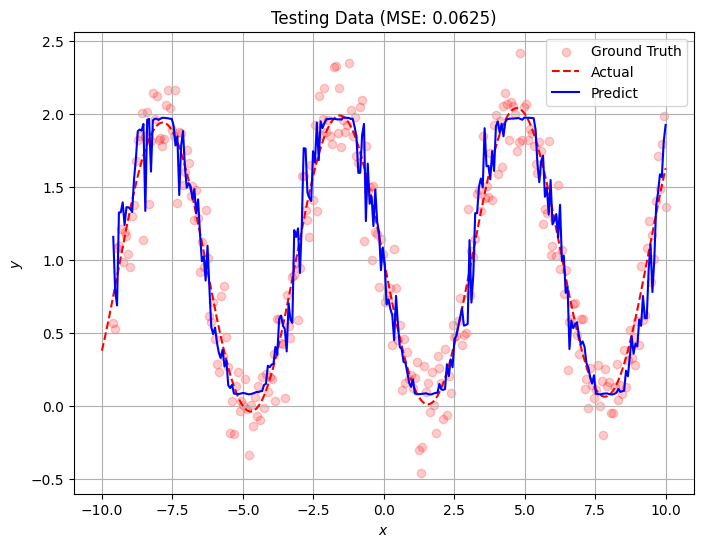

In [22]:
##### Evaluate the model #####
model.eval()

y_true = []
y_preds = []

# Disable gradient calculation to save memory and speed up computations
with torch.no_grad():
    for batch in test_dataloader:
        x_batch, y_batch = batch
        y_pred = model(x_batch)
        y_preds.append(y_pred)
        y_true.append(y_batch)

# Concatenate all batches
y_pred_all = torch.cat(y_preds, dim=0)
y_true_all = torch.cat(y_true, dim=0)
x_plot = x[window_size:]  # Adjust x for plotting

# Compute MSE
mse_test = criterion(y_pred_all, y_true_all).item()
print(f'Test MSE: {mse_test:.4f}')

# Plot predictions vs true values
fig7 = plt.figure(figsize=(8, 6))

plt.scatter(x_plot.numpy(), y_true_all.numpy(), c='red', alpha=0.2, label='Ground Truth')
plt.plot(x.numpy(), y_noiseless.numpy(), linestyle='--', c='red', label='Actual')
plt.plot(x_plot.numpy(), y_pred_all.numpy(), c='blue', label='Predict')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)
plt.title(f'Testing Data (MSE: {mse_test:.4f})')
plt.show()

## Save figures


In [ ]:
# fig1.savefig('basic_dataset_fig1.pdf', bbox_inches='tight')
# fig2.savefig('basic_dataset_fig2.pdf', bbox_inches='tight')
# fig3.savefig('basic_dataset_fig3.pdf', bbox_inches='tight')
# fig4.savefig('basic_dataset_fig4.pdf', bbox_inches='tight')
# fig5.savefig('basic_dataset_fig5.pdf', bbox_inches='tight')
# fig6.savefig('basic_dataset_fig6.pdf', bbox_inches='tight')
# fig7.savefig('basic_dataset_fig7.pdf', bbox_inches='tight')